### Evaluation Project - 5

--------------------

# Census_Income_Project :- 

-----------------------

### Submitted by : Shahla M 

### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

To download the dataset, use the link given below.

Downlaod Files: https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### Import data from github and start the preprocessing steps:

In [3]:
# import data and check 6 different samples

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# checking shapes

data.shape

(32560, 15)

### OBSERVATIONS :

This Dataset has 32560 rows and 15 columns. Let's study the column's names and their charectaristics.

In [5]:
# checking columns names

data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### OBSERVATIONS :

No null values are present in the total dataset.

### Checking duplicate:

In [6]:
#checking duplicate

data.duplicated().sum()

24

In [7]:
data.drop_duplicates(keep= 'first',inplace= True )

In [8]:
data.shape

(32536, 15)

In [9]:


data.duplicated().sum()



0

### Checking different statistical parameter:

In [10]:


data.describe()



,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:


data.nunique()



Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB



### OBSERVATIONS :


  -  9 are object datatype that is categorical data and 6 are int datatype.
  -  Target variable is Income which is a categorical data, needs classification model to predict this.
  - Seems outliers are present in the overall dataset because most of the features has a difference between 75% percentile and max value.
  -  Income has two different categories



In [13]:
data["Workclass"]. unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

### OBSERVATIONS :

This dataset cotains "?" sign. Let's check it further

In [14]:


data.isin([' ?']).sum()



Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

### OBSERVATIONS :
let's replace "?" with nan.


In [15]:


data=data.replace(' ?',np.NaN)



### OBSERVATIONS :

Let check if any whitespace, 'NA' or '-' exist in dataset

In [16]:


data.isin([' ','NA','-']).sum()



Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### OBSERVATIONS :


  -  Replace ' ?' with np.NaN
  -  No blank space, NA, '-', '?' exist in dataset.

### Checking Null:

In [17]:
#checking null values

null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l , axis =1, keys =['Null Values', 'Null Values percentage']))


missing value details 

                 Null Values  Null Values percentage
Age                       0                0.000000
Workclass              1836                5.642980
Fnlwgt                    0                0.000000
Education                 0                0.000000
Education_num             0                0.000000
Marital_status            0                0.000000
Occupation             1843                5.664495
Relationship              0                0.000000
Race                      0                0.000000
Sex                       0                0.000000
Capital_gain              0                0.000000
Capital_loss              0                0.000000
Hours_per_week            0                0.000000
Native_country          582                1.788788
Income                    0                0.000000


<AxesSubplot:>

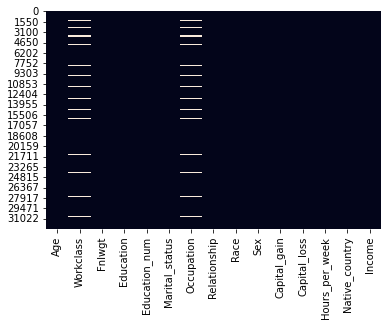

In [18]:


sns.heatmap(data.isnull(),cbar=False)



### OBSERVATIONS :


No duplicate rows are present in the dataset.

### Missing value imputation

Workclass,Occupation and Native_country are categorical variable so we can imputate them with mode of that feature.


In [19]:
# Imputating Missing value with mode for categorical features
data['Occupation'].fillna(data['Occupation'].mode()[0],inplace=True)
data['Workclass'].fillna(data['Workclass'].mode()[0],inplace=True)
data['Native_country'].fillna(data['Native_country'].mode()[0],inplace=True)


### OBSERVATIONS :
No Missing Value is Present.

### Statistical analysis:


In [20]:


data.describe().round(2)



,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.00,32536.00,32536.00,32536.00,32536.00,32536.00
mean,38.59,189784.30,10.08,1078.41,87.37,40.44
std,13.64,105556.26,2.57,7388.07,403.11,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117831.50,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,236993.25,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


### OBSERVATIONS :


  -  The minimum and maximum age of people in the dataset is 17 and 90 years respectively.
  -  The minimum and maximum Education_num is 1 and 16 respectively.
  -  The minimum of Capital_gain, Capital_loss and Hours_per_week is 0.
  -  The 25%,50% and 75% percentile is 0. This seems there must be some error within the data collection.
  -  The number of hours_per_week varies between 1 to 99.

## EDA

### Univariate Analysis:


### Exploration of categorical features:

In [21]:
cat=["Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]
for i in cat:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of Workclass is---
  Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Value counts of Education is---
  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Value counts of Marital_status is---
  Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype:

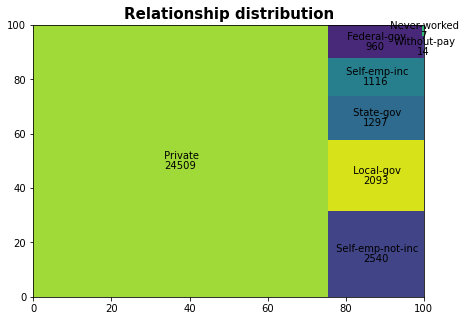

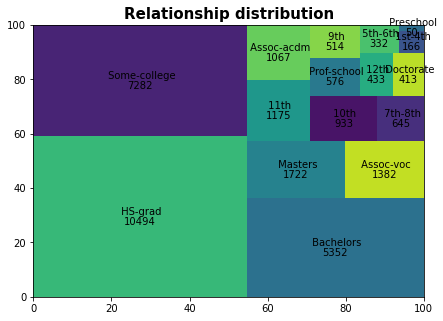

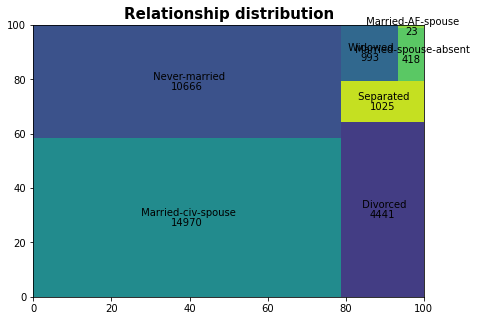

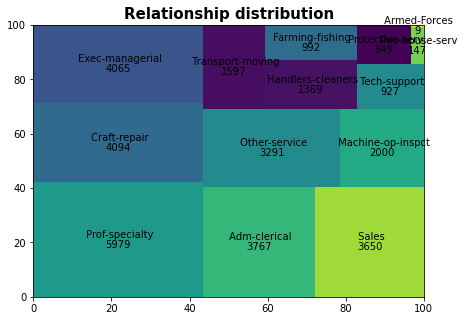

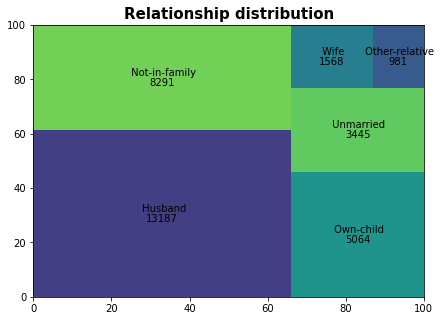

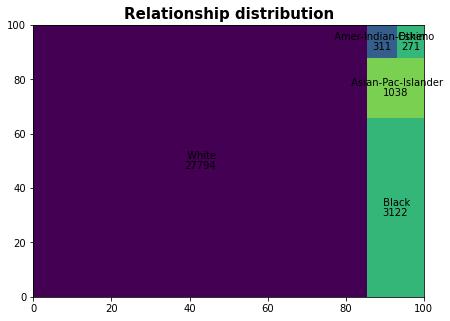

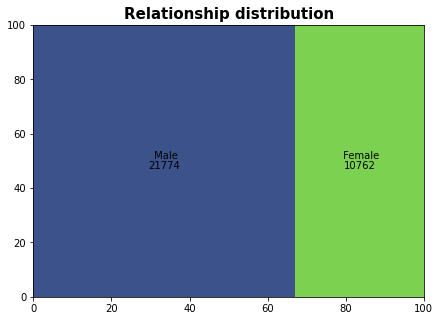

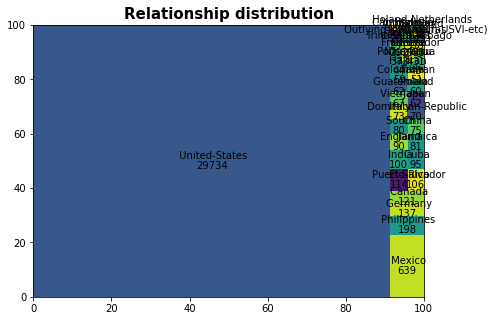

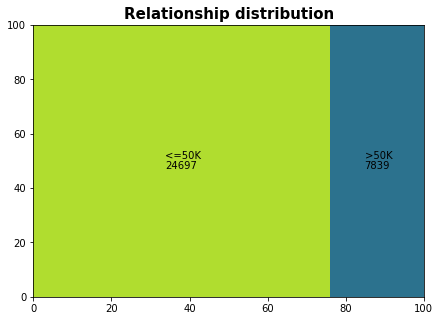

In [22]:
import squarify
for i in cat:
    plt.figure(figsize=(7, 5))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})
    plt.show()

### OBSERVATIONS :


  -  Max no of peoples are worked in private sector.
  -  Max no of peoples are in 12th grade Education, there is very less no of Doctorate and pre school standard.
  -  Max no of peoples are Married civilian spouse in marital status while very very no of people are married a Armed Forces spouce.
  -  Max no of peoples are in professional speciality group and again a very less no of people who are worked in Armed Forces.

###  Analysis of Numerical variable:

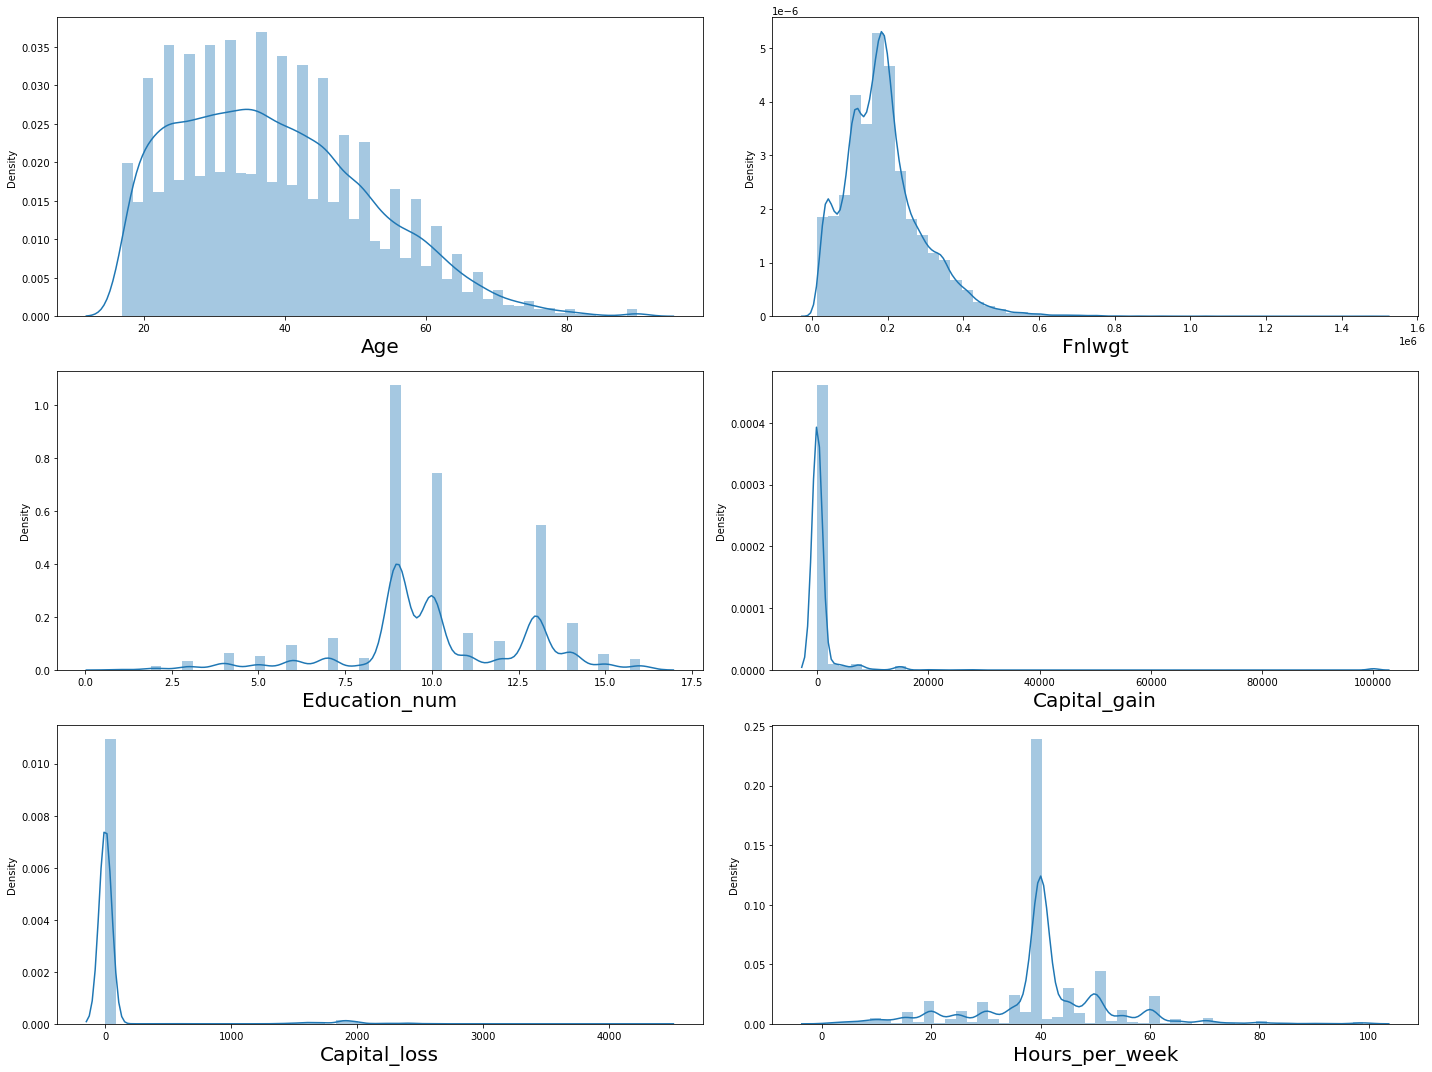

In [23]:
#distribution of numerical features.

data_num = data[["Age", "Fnlwgt", "Education_num", "Capital_gain", "Capital_loss", "Hours_per_week"]]
i=0
plt.figure(figsize=(20,15))
for p in data_num.columns:
    plt.subplot(3,2,i+1)
    sns.distplot(data_num[p], bins=50)
    plt.xlabel(p,fontsize=20)
    i+=1  
plt.tight_layout()

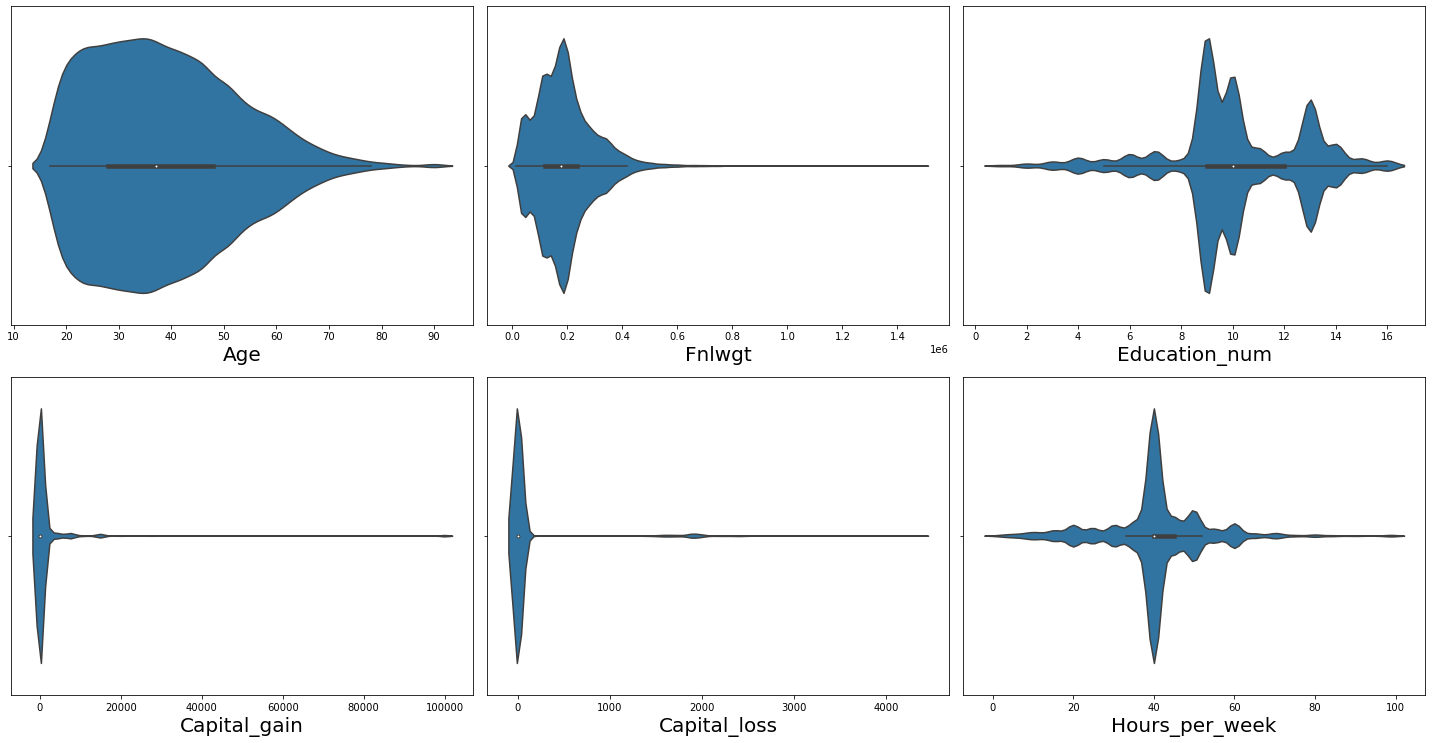

In [24]:
i=0
plt.figure(figsize=(20,15))
for p in data_num.columns:
    plt.subplot(3,3,i+1)
    sns.violinplot(data_num[p])
    plt.xlabel(p,fontsize=20)
    i+=1
    
plt.tight_layout()

### OBSERVATIONS :


  -  Avg range of age is 20-80 years.
  -  Fnlwgt range is 0-0.4
  -  max educatio num of year is 9-10 yrs
  -  max working hours per week is 40 hrs whereas max loss and gain of capital is 0.
  -  All the data have right skewness

### Analysis of Target variable:

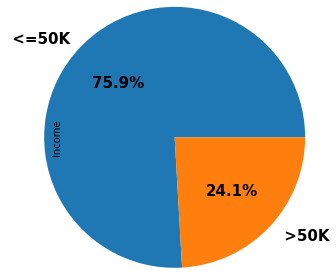

In [25]:
data['Income'].value_counts().plot.pie(radius =1.5, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

### OBSERVATIONS:

  -  75.9 % population have income less than 50K and 24.1% have income greater than 50K.
  -  Income dataset is imbalanced.

### Different feature's impact on target variable:

### Bivariate Analysis:

### 1. Workclass on Income:


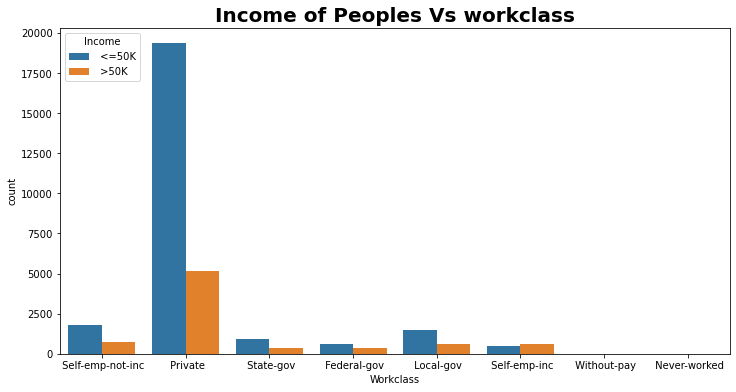

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data['Workclass'], hue= data['Income'])
plt.title('Income of Peoples Vs workclass', fontsize=20, fontweight='bold')
plt.xlabel('Workclass')
plt.show()

In [27]:
pd.crosstab(data['Income'],data["Workclass"], margins= True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


### OBSERVATIONS :


  -  Maximum income source is from private class and the income range is <=50K
  -  There are very less number of people who Never-worked and Without-pay. And it is also obvious that the income of these two types of people is must be less tn 50K
  -   In Self Employed Incorporated category(self_emp-inc), the number of people who earn >50K are less than the number of people who earn 50K.

### 2. Education Vs Income:

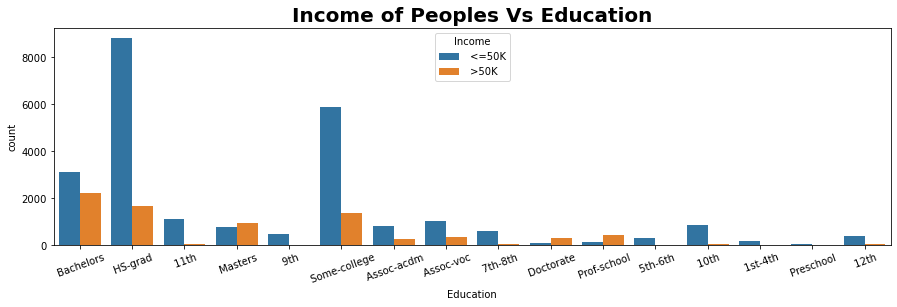

In [28]:
plt.figure(figsize=(15,4))
sns.countplot(data['Education'], hue= data['Income'])
plt.title('Income of Peoples Vs Education', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10,rotation=20)
plt.show()

In [29]:


pd.crosstab(data['Income'],data["Education"], margins= True)



Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
Income,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,160,316,605,487,802,1021,3131,107,8820,763,50,153,5896,24697
>50K,62,60,33,6,16,40,27,265,361,2221,306,1674,959,0,423,1386,7839
All,933,1175,433,166,332,645,514,1067,1382,5352,413,10494,1722,50,576,7282,32536


### OBSERVATIONS :

  -  Most of the people with qualification upto HS grad and the maximum no of their salary <=50K
  -  only 413 persons are in Doctorate group. They are belongs in a highly qualified background and obviously maximum peoplw among them earned >50K.
  -  Very less number of people(50 people) are in preschool level. It is quite obvious that they earn less than 50K. But still it's unfortunate too!! Because, at the year of 1994, there should not be any adult only with pre school qualification.
  -  Maximum number of people who earn more than 50K are Bachelors.

### 3. Marital_status Vs Income:


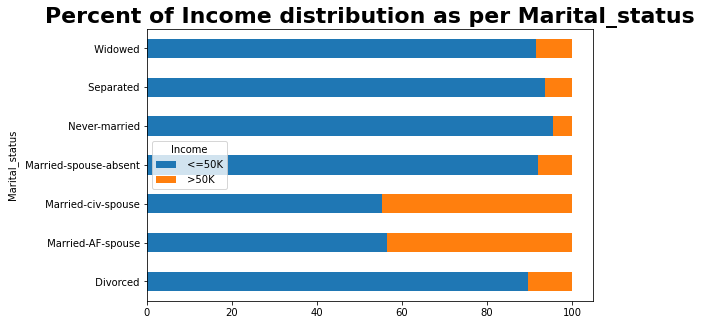

In [30]:
table= pd.crosstab(data['Marital_status'], data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of Income distribution as per Marital_status', fontsize=22, fontweight='bold')
plt.show()

In [31]:


pd.crosstab(data['Income'],data["Marital_status"], margins= True)



Marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,All
Income,,,,,,,,
<=50K,3978,13,8280,384,10175,959,908,24697
>50K,463,10,6690,34,491,66,85,7839
All,4441,23,14970,418,10666,1025,993,32536


### OBSERVATIONS :

  -  Most of the people are married civilian spouse who have earned more than 50K
  -  there are 7839 peoples who earned more than 50K.
  -  From never mrried category arround 95% earned less than 50K.
  -  For the Married-AF-spouse and Married-civ-spouse categoey the ration of two type of income group is arround 50:50.

### 4. Occupation Vs Income:


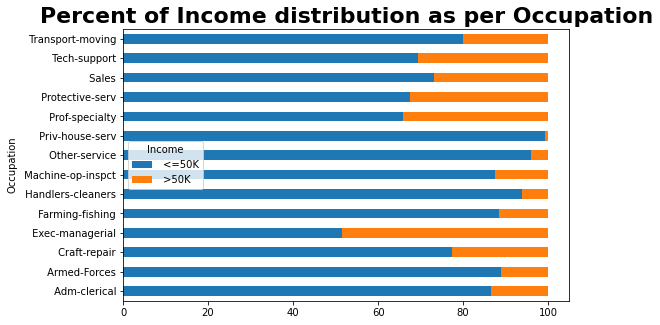

In [32]:
table= pd.crosstab(data['Occupation'], data['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,5))
plt.title('Percent of Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.show()

In [33]:
pd.crosstab(data['Occupation'],data["Income"], margins=True).T

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
Income,,,,,,,,,,,,,,,
<=50K,3260,8,3165,2097,877,1283,1751,3154,146,3930,438,2667,644,1277,24697
>50K,507,1,929,1968,115,86,249,137,1,2049,211,983,283,320,7839
All,3767,9,4094,4065,992,1369,2000,3291,147,5979,649,3650,927,1597,32536


### OBSERVATIONS :

  -  Arround 100% people are in <50K income group for priv-house-serv(only 1 person got >50K).
  -  For Exec-managerial categoey the ration of two type of income group is arround 50:50.
  -  Peoples who worked in tech support, protective service, prof- specialty, sales are more likely to earn more than 50K in a year.

### 5. Relationship Vs Income:


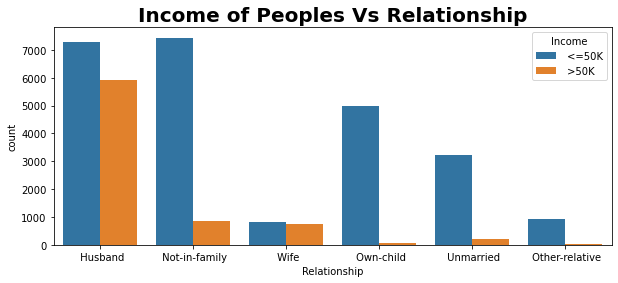

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(data['Relationship'], hue= data['Income'])
plt.title('Income of Peoples Vs Relationship', fontsize=20, fontweight='bold')
plt.show()



In [35]:


pd.crosstab(data['Relationship'],data["Income"], margins=True).T



Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
Income,,,,,,,
<=50K,7271,7435,944,4997,3227,823,24697
>50K,5916,856,37,67,218,745,7839
All,13187,8291,981,5064,3445,1568,32536


### OBSERVATIONS :


  -  For Wife categoey the ratio of two type of income group is arround 50:50.
  -  For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
  -  For Own-child, the max income is <50

### 6. Race Vs Income:

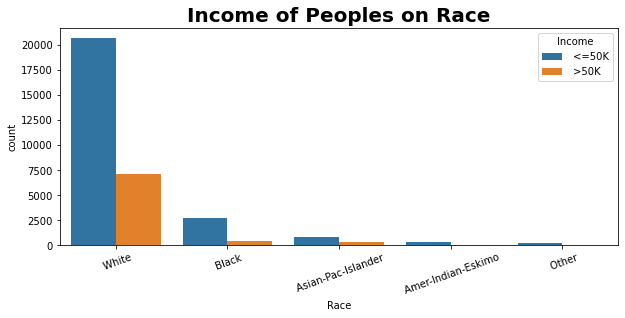

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(data['Race'], hue= data['Income'])
plt.title('Income of Peoples on Race', fontsize=20, fontweight='bold')
plt.xlabel('Race')
plt.xticks(fontsize=10,rotation=20)
plt.show()



In [37]:


pd.crosstab(data['Race'],data["Income"], margins=True).T



Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
Income,,,,,,
<=50K,275,762,2735,246,20679,24697
>50K,36,276,387,25,7115,7839
All,311,1038,3122,271,27794,32536


### OBSERVATIONS :

  -  85.4 % peoples are whites and 9.6% are in black community.
  -  Maximum peoples with income range in greater than 50K are in White category.

### 7. Sex vs Income:


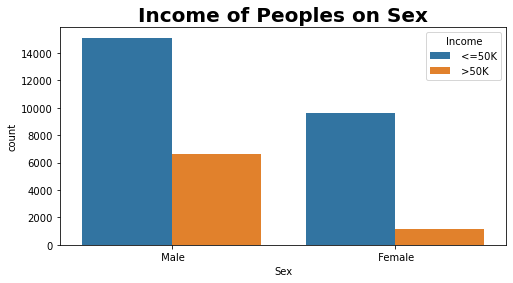

In [38]:
plt.figure(figsize=(8,4))
sns.countplot(data['Sex'], hue= data['Income'])
plt.title('Income of Peoples on Sex', fontsize=20, fontweight='bold')
plt.xlabel('Sex')
plt.show()

In [39]:


pd.crosstab(data['Sex'],data["Income"], margins=True).T



Sex,Female,Male,All
Income,,,
<=50K,9583,15114,24697
>50K,1179,6660,7839
All,10762,21774,32536


### OBSERVATIONS :


  -  From total people 67% are in Male.
  -  Around 1000 Women are in Greater Than 50K earning group.

### 8. Native_country vs Income:

In [40]:


pd.crosstab(data['Native_country'],data["Income"], margins=True)



Income,<=50K,>50K,All
Native_country,,,
Cambodia,12,7,19
Canada,82,39,121
China,55,20,75
Columbia,57,2,59
Cuba,70,25,95
Dominican-Republic,68,2,70
Ecuador,24,4,28
El-Salvador,97,9,106
England,60,30,90


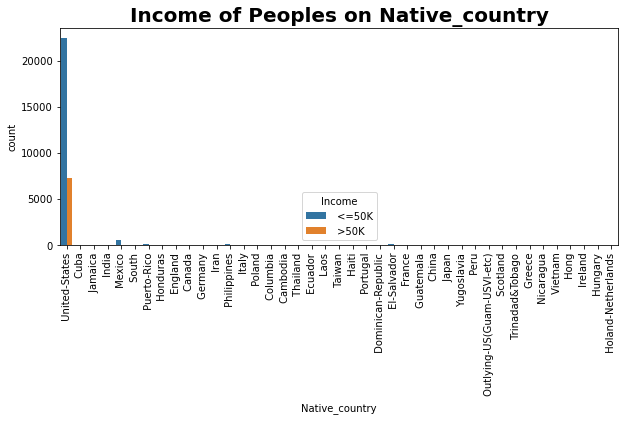

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(data['Native_country'], hue= data['Income'])
plt.title('Income of Peoples on Native_country', fontsize=20, fontweight='bold')
plt.xlabel('Native_country')
plt.xticks(fontsize=10,rotation=90)
plt.show()

In [42]:


pd.crosstab(data['Native_country'],data["Income"], margins=True).T



Native_country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,All
Income,,,,,,,,,,,,,,,,,,,,,
<=50K,12,82,55,57,70,68,24,97,60,17,...,102,9,64,31,15,17,22419,62,10,24697
>50K,7,39,20,2,25,2,4,9,30,12,...,12,3,16,20,3,2,7315,5,6,7839
All,19,121,75,59,95,70,28,106,90,29,...,114,12,80,51,18,19,29734,67,16,32536


### OBSERVATIONS :

  -  There are 91.4 % of people from United-States followed by Maxico with 2% and rest 40 countries are only 6.6%.
  -  Nothing interesting are shown from this graph.

### 9.Age Vs Income:


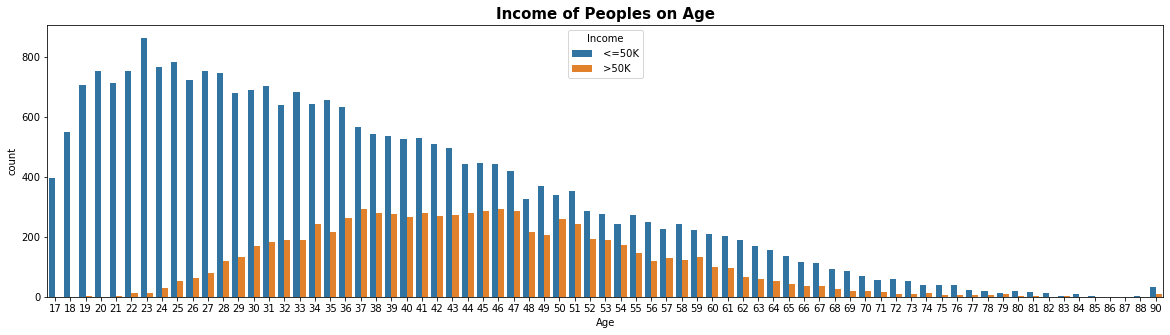

In [43]:
plt.figure(figsize=(20, 5))
sns.countplot(data['Age'], hue=data['Income'])
plt.title('Income of Peoples on Age', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Age')
plt.show()

### OBSERVATIONS :

   - Interestingly the max no of people with income range >50K are in 37-50 years. As Age increased, the amount of income also decreased i.e. it sometimes indicates retirement after a certain age.
   - The max no of people are in the age group 20-30 years with salary range <=50K per year.

### 10. Education_num vs Income:

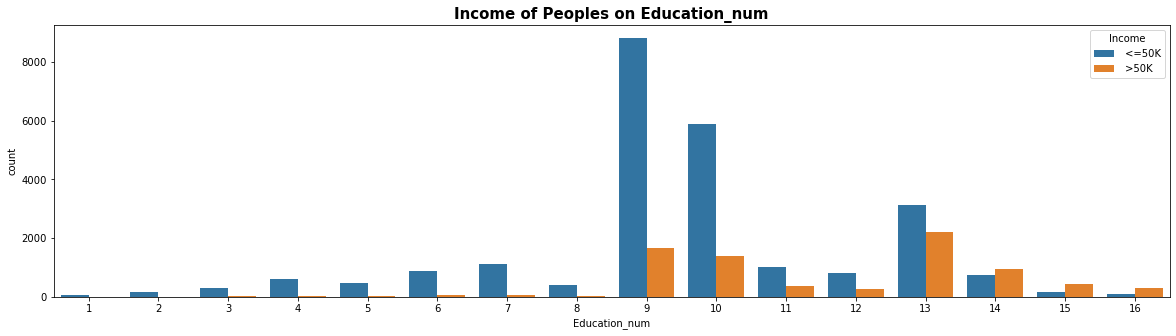

In [44]:
plt.figure(figsize=(20, 5))
sns.countplot(data['Education_num'], hue=data['Income'])
plt.title('Income of Peoples on Education_num', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Education_num')
plt.show()

### OBSERVATION:



 -   Max no of year of education is 9 with <=50K income.
 -   For no of year of education 14, 15, 16 years the max no of prople get >50K salary per year.

### 11. Capital_gain vs income:

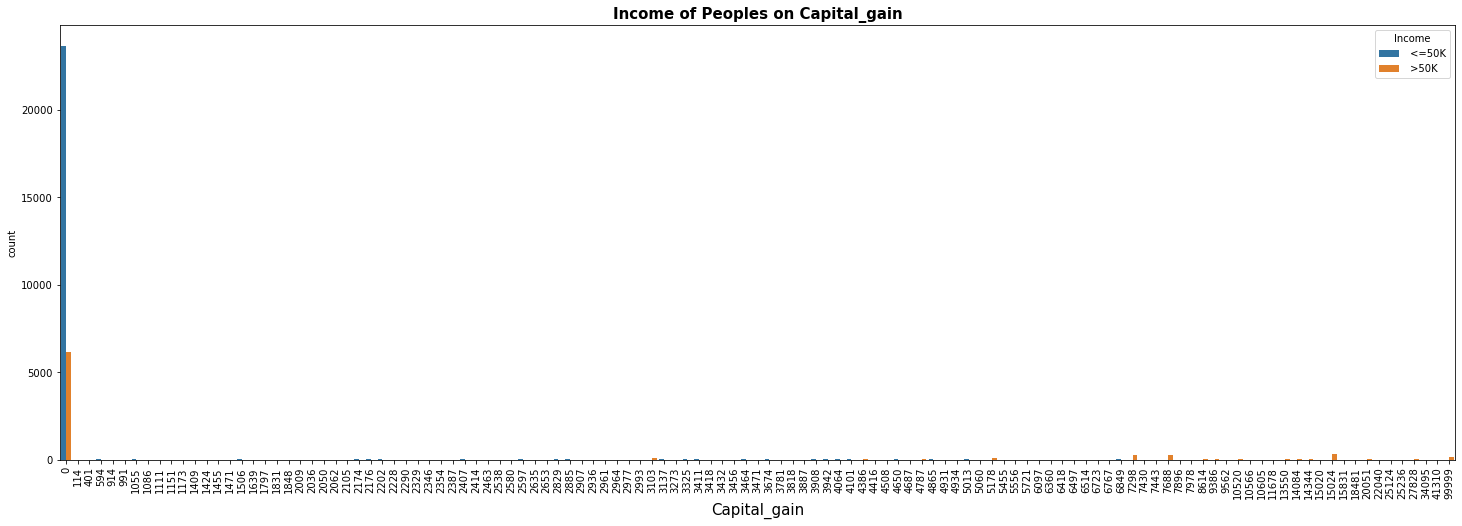

In [45]:
plt.figure(figsize=(25,8))
sns.countplot(data['Capital_gain'], hue=data['Income'])
plt.title('Income of Peoples on Capital_gain', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(fontsize=10,rotation=90)
plt.xlabel('Capital_gain', fontsize= 15)
plt.show()

In [46]:


pd.crosstab(data['Capital_gain']==0, data["Income"], margins=True)



Income,<=50K,>50K,All
Capital_gain,,,
False,1034,1677,2711
True,23663,6162,29825
All,24697,7839,32536


In [1]:
29825/32536

0.9166769117285468

### OBSERVATION:


  -  Max capital gain is 0 with 29825 people i.e. 91% and max of them(23663 people) are in <=50K and 6162 in > 50K.
  -  So skewness exist in them.

### 12. Capital_loss vs income:

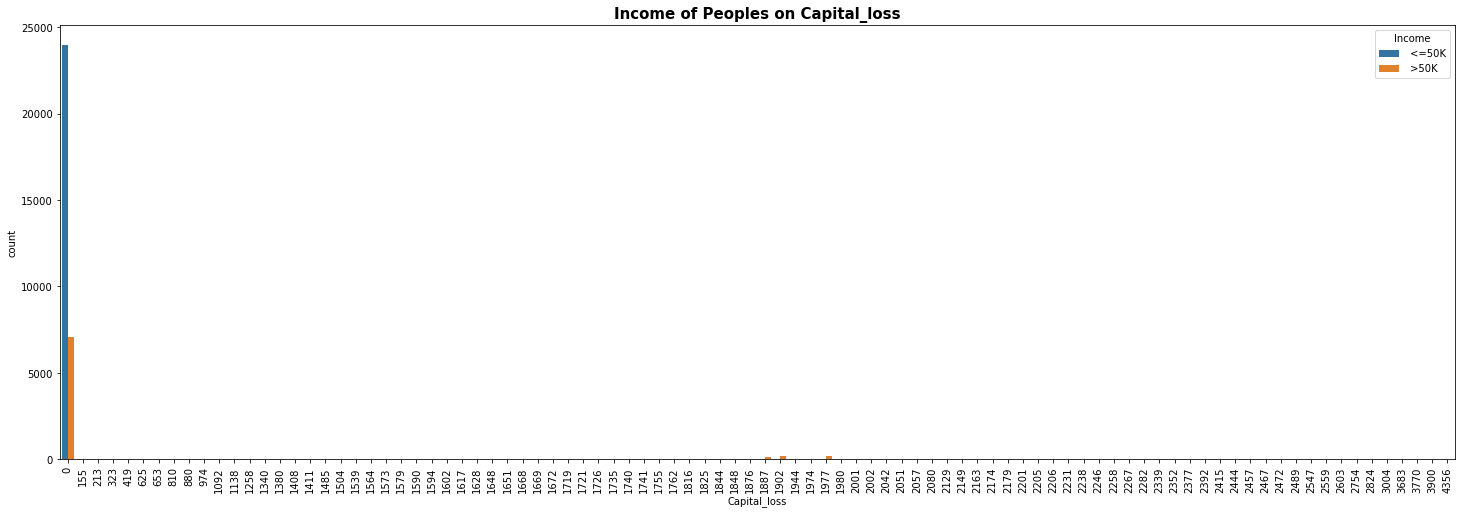

In [47]:
plt.figure(figsize=(25,8))
sns.countplot(data['Capital_loss'], hue=data['Income'])
plt.title('Income of Peoples on Capital_loss', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(fontsize=10,rotation=90)
plt.show()

In [48]:


pd.crosstab(data['Capital_loss']==0, data["Income"], margins=True)



Income,<=50K,>50K,All
Capital_loss,,,
False,746,773,1519
True,23951,7066,31017
All,24697,7839,32536


In [2]:
31017/32536

0.9533132530120482

### OBSERVATION:


  -  Max capital gain is 0 with 31017 people i.e. 95% and max of them(23951 people) are in <=50K and 7066 in > 50K.
  -  So skewness exist in them.

### 13. Hours_per_week vs income:

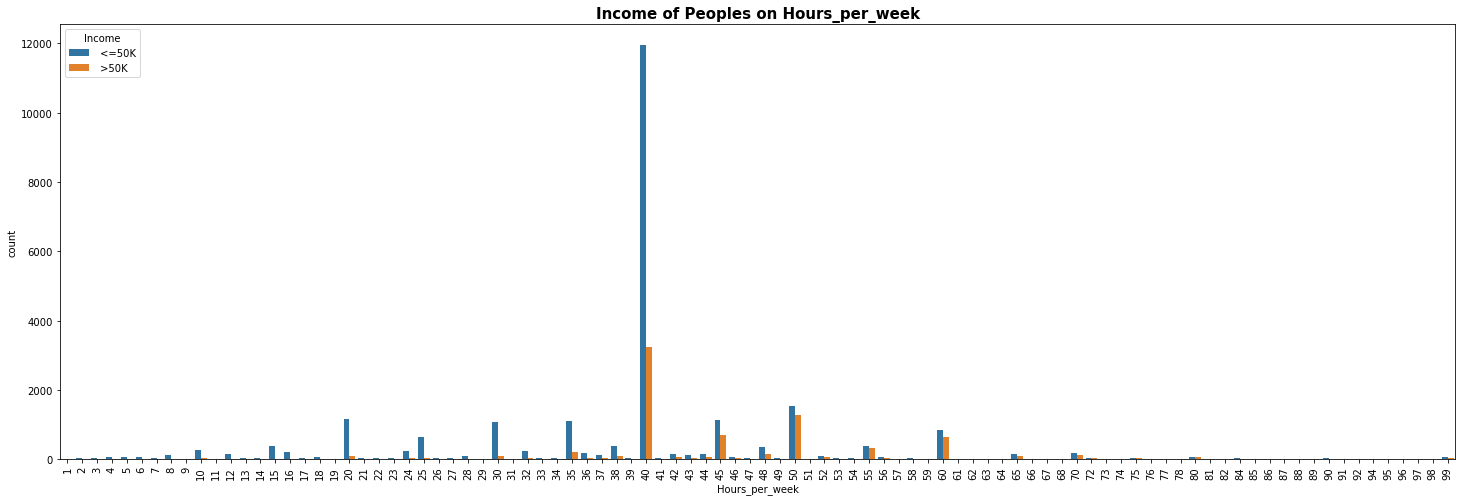

In [49]:
plt.figure(figsize=(25,8))
sns.countplot(data['Hours_per_week'], hue=data['Income'])
plt.title('Income of Peoples on Hours_per_week', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(fontsize=10,rotation=90)
plt.show()

In [50]:


pd.crosstab(data['Hours_per_week']==40, data["Income"], margins=True)



Income,<=50K,>50K,All
Hours_per_week,,,
False,12740,4593,17333
True,11957,3246,15203
All,24697,7839,32536


In [3]:


15203/32536



0.46726702729284486


### OBSERVATION:

 -   Max Hours_per_week is 40 with 15203 people i.e. 46%.
 -   work hour range is in between 40- 50hours.

### Exploration of different features:

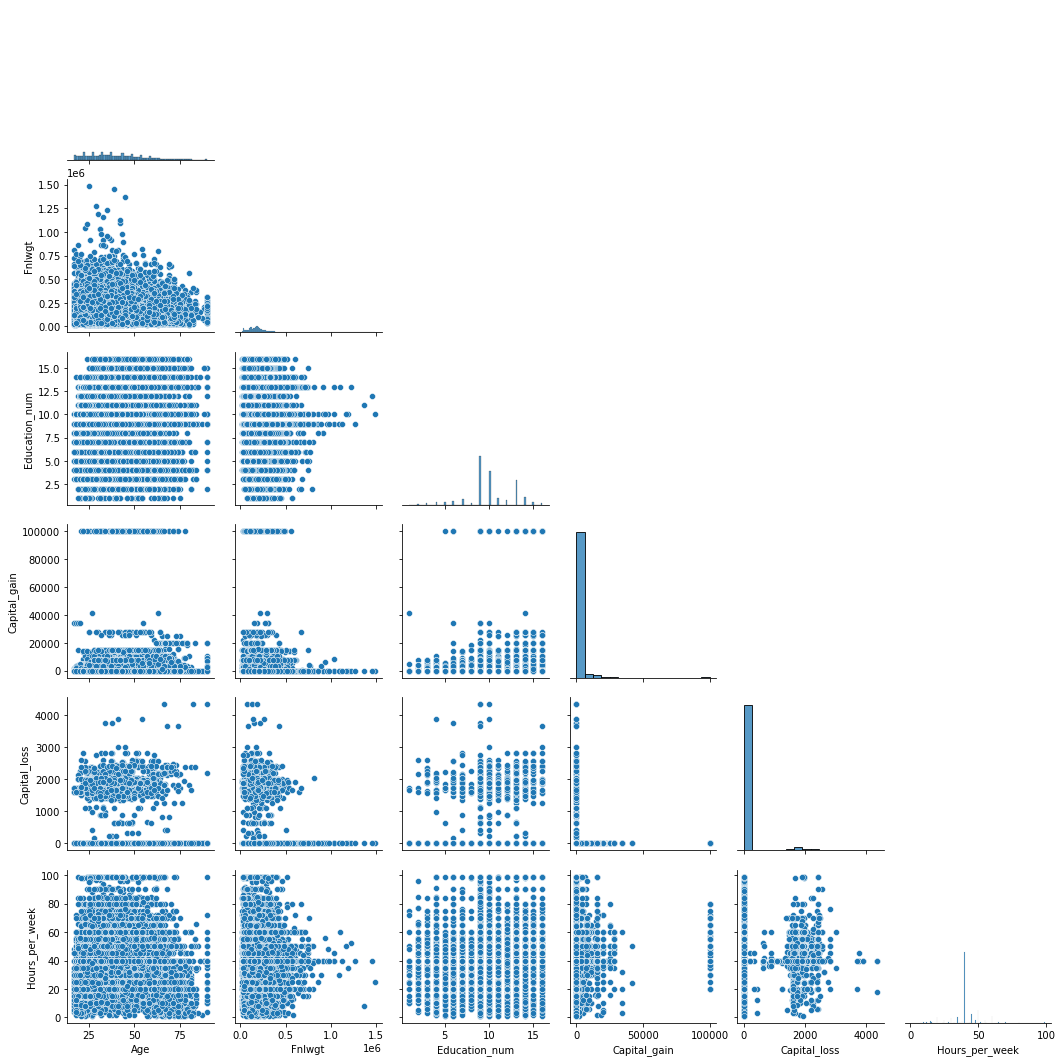

In [51]:
sns.pairplot(data, kind='scatter', corner=True)
plt.show()

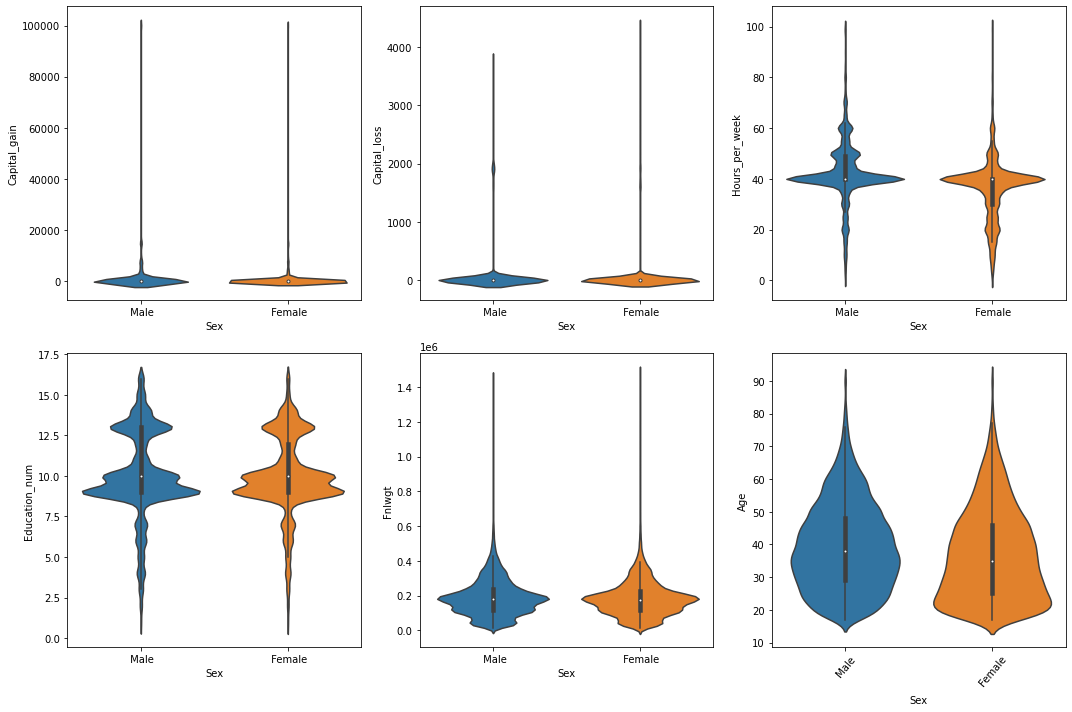

In [52]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

sns.violinplot(x = data['Sex'], y = data['Capital_gain'], data = data, ax=axes[0,0])
plt.xticks(fontsize=10,rotation=50)
sns.violinplot(x = data['Sex'], y = data['Capital_loss'], data = data, ax=axes[0,1])
plt.xticks(fontsize=10,rotation=50)
sns.violinplot(x = data['Sex'], y = data['Hours_per_week'], data = data, ax=axes[0,2])
plt.xticks(fontsize=10,rotation=50)
sns.violinplot(x = data['Sex'], y = data['Education_num'], data = data, ax=axes[1,0])
plt.xticks(fontsize=10,rotation=50)
sns.violinplot(x = data['Sex'], y = data['Fnlwgt'], data = data, ax=axes[1,1])
plt.xticks(fontsize=10,rotation=50)
sns.violinplot(x = data['Sex'], y = data['Age'], data = data, ax=axes[1,2])
plt.xticks(fontsize=10,rotation=50)
plt.tight_layout()
plt.show()

### OBSERVATION:

Data distribution pattern with different features and sex column is simillar.



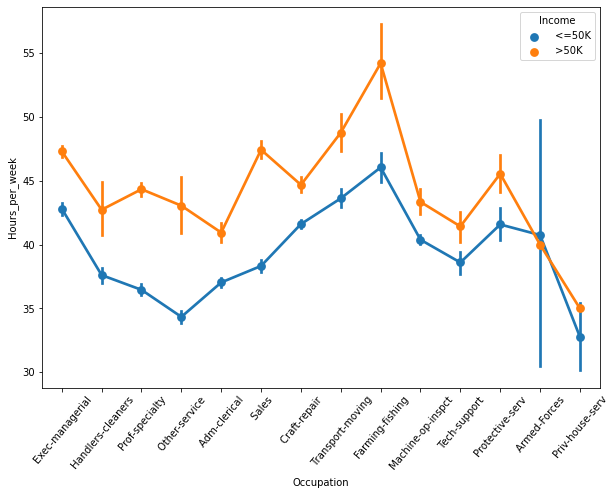

In [53]:
plt.figure(figsize=(10,7))
sns.pointplot(x = data['Occupation'], y = data['Hours_per_week'], data = data,  hue= data['Income'])
plt.xticks(fontsize=10,rotation=50)
plt.show()

### OBSERVATION:


  -  The max hours spending in the occupation farmimg and fishing whereas the min work hour is for priv-house-serv.
  -  The high salaried person spends more time as compare to low salary




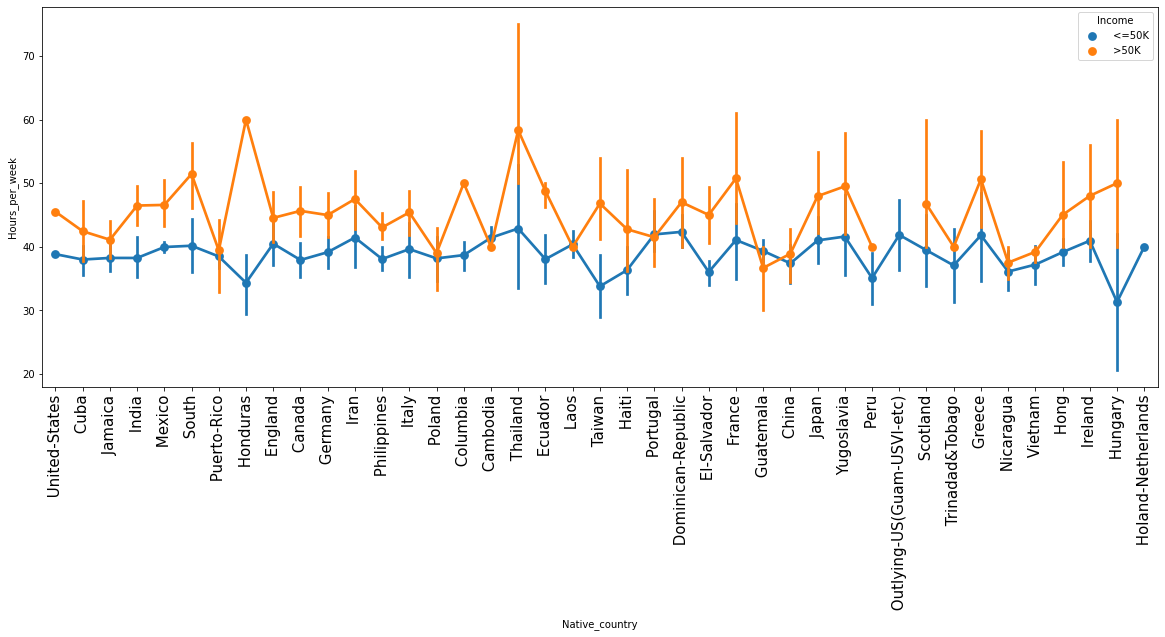

In [54]:
plt.figure(figsize=(20,7))
sns.pointplot(x = data['Native_country'], y = data['Hours_per_week'], data = data,  hue= data['Income'])
plt.xticks(fontsize=15,rotation=90)
plt.show()

### OBSERVATION:

   - For Honduras and Thailand, the work hour is max
   - Lowest work hour is for hungery but salary is <50k.





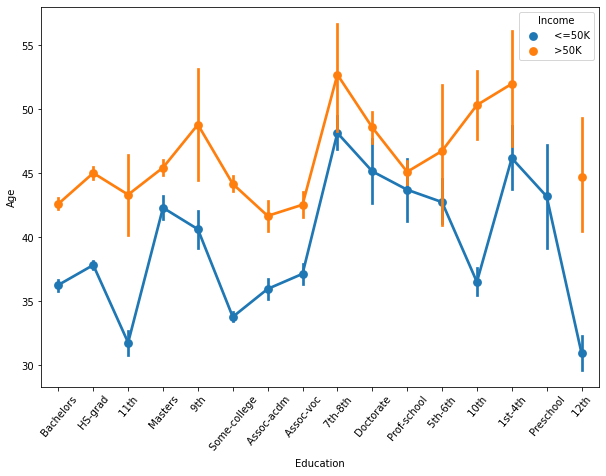

In [55]:


plt.figure(figsize=(10,7))
sns.pointplot(x = data['Education'], y = data['Age'], data = data,  hue= data['Income'])
plt.xticks(fontsize=10,rotation=50)
plt.show()



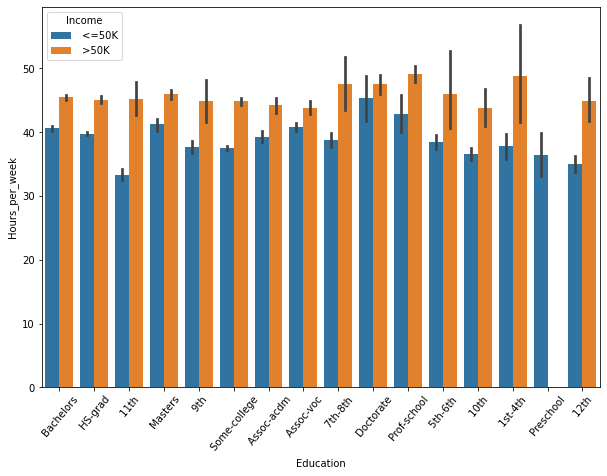

In [56]:


plt.figure(figsize=(10,7))
sns.barplot(x = data['Education'], y = data['Hours_per_week'], data = data,  hue= data['Income'])
plt.xticks(fontsize=10,rotation=50)
plt.show()



### OBSERVATION:




 -   high salaried person age is also high compared to the person whose salary is <= 50K per yr
 -    for 11-12 std , age is low and obviously for doctorate and masters age is high.
 -   the peoples whose education is 7-8th std, they earned <=50K at the age range 45-50 wheather others in this range earned >50k
 -   As hours per week increased, salary is also increased for every educational level



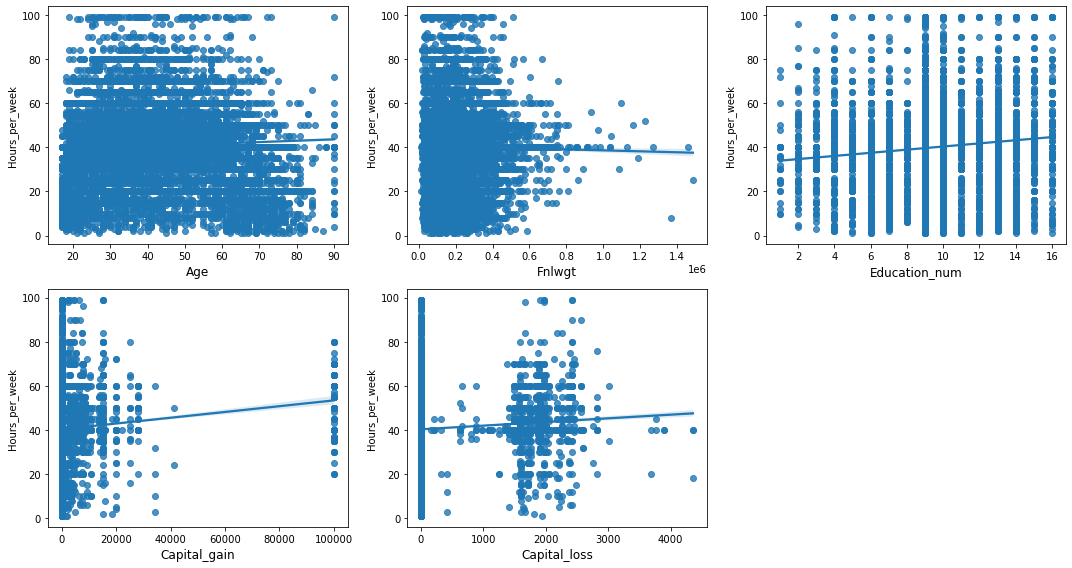

In [57]:
i=0
plt.figure(figsize=(15,8))
for p in data_num.drop('Hours_per_week', axis = 1).columns:
    plt.subplot(2,3,i+1)
    sns.regplot(x=p, y='Hours_per_week', data=data_num)
    plt.xlabel(p,fontsize=12)
    i+=1
plt.tight_layout()

### OBSERVATIONS :

No such relation is found between differnt features and Hours_per_week

In [58]:
pd.crosstab(data['Marital_status'],[data.Income, data.Workclass], margins=True)



Income                        <=50K                                    \
Workclass               Federal-gov  Local-gov  Never-worked  Private   
Marital_status                                                          
 Divorced                       140        329             1     3000   
 Married-AF-spouse                1          0             0       10   
 Married-civ-spouse             167        501             1     5974   
 Married-spouse-absent            9         21             0      310   
 Never-married                  220        489             5     8599   
 Separated                       21         58             0      773   
 Widowed                         31         78             0      691   
All                             589       1476             7    19357   

Income                                                             \
Workclass               Self-emp-inc  Self-emp-not-inc  State-gov   
Marital_status                                                      
 Divorced                         76               246        186   
 Married-AF-spouse                 0                 1          1   
 Married-civ-spouse              271              1073        285   
 Married-spouse-absent             5                23         15   
 Never-married                   109               358        391   
 Separated                        15                51         41   
 Widowed                          18                64         25   
All                              494              1816        944   

Income                                      >50K                      \
Workclass               Without-pay  Federal-gov  Local-gov  Private   
Marital_status                                                         
 Divorced                         0           28         40      301   
 Married-AF-spouse                0            2          0        7   
 Married-civ-spouse               8          304        522     4389   
 Married-spouse-absent            1            2          1       21   
 Never-married                    4           25         41      337   
 Separated                        0            5          5       47   
 Widowed                          1            5          8       50   
All                              14          371        617     5152   

Income                                                               All  
Workclass               Self-emp-inc  Self-emp-not-inc  State-gov         
Marital_status                                                            
 Divorced                         24                46         24   4441  
 Married-AF-spouse                 0                 1          0     23  
 Married-civ-spouse              566               606        303  14970  
 Married-spouse-absent             0                 8          2    418  
 Never-married                    16                51         21  10666  
 Separated                         5                 2          2   1025  
 Widowed                          11                10          1    993  
All                              622               724        353  32536

In [59]:


pd.crosstab(data['Education'],data["Workclass"], margins=True)



Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


In [60]:
pd.crosstab(data['Sex'],[data.Income, data. Marital_status], margins=True)


Income             <=50K                                         \
Marital_status  Divorced  Married-AF-spouse  Married-civ-spouse   
Sex                                                               
 Female             2491                  8                 903   
 Male               1487                  5                7377   
All                 3978                 13                8280   

Income                                                                    \
Marital_status  Married-spouse-absent  Never-married  Separated  Widowed   
Sex                                                                        
 Female                           194           4594        614      779   
 Male                             190           5581        345      129   
All                               384          10175        959      908   

Income              >50K                                         \
Marital_status  Divorced  Married-AF-spouse  Married-civ-spouse   
Sex                                                               
 Female              179                  6                 754   
 Male                284                  4                5936   
All                  463                 10                6690   

Income                                                                    \
Marital_status  Married-spouse-absent  Never-married  Separated  Widowed   
Sex                                                                        
 Female                            11            166         17       46   
 Male                              23            325         49       39   
All                                34            491         66       85   

Income            All  
Marital_status         
Sex                    
 Female         10762  
 Male           21774  
All             32536

In [61]:
pd.crosstab(data['Occupation'],[data.Workclass, data.Sex], margins=True)


Workclass           Federal-gov        Local-gov        Never-worked        \
Sex                      Female  Male     Female  Male        Female  Male   
Occupation                                                                   
 Adm-clerical               134   183        218    65             0     0   
 Armed-Forces                 0     9          0     0             0     0   
 Craft-repair                 4    60          6   140             0     0   
 Exec-managerial             68   112         59   155             0     0   
 Farming-fishing              1     7          0    29             0     0   
 Handlers-cleaners            4    19          3    44             0     0   
 Machine-op-inspct            2    12          2    10             0     0   
 Other-service               15    20         94    99             0     0   
 Priv-house-serv              0     0          0     0             0     0   
 Prof-specialty              58   117        384   321             2     5   
 Protective-serv              4    24         32   272             0     0   
 Sales                        6     8          2     5             0     0   
 Tech-support                16    52         15    23             0     0   
 Transport-moving             3    22         20    95             0     0   
All                         315   645        835  1258             2     5   

Workclass           Private         Self-emp-inc        Self-emp-not-inc  \
Sex                  Female   Male        Female  Male            Female   
Occupation                                                                 
 Adm-clerical          1963    868            22     9                35   
 Armed-Forces             0      0             0     0                 0   
 Craft-repair           194   2997             1   105                15   
 Exec-managerial        864   1826            42   358                57   
 Farming-fishing         40    413             2    49                20   
 Handlers-cleaners      154   1118             0     2                 2   
 Machine-op-inspct      534   1377             2    11                 5   
 Other-service         1507   1229             8    19               112   
 Priv-house-serv        139      8             0     0                 0   
 Prof-specialty        1663   2482            16   144                86   
 Protective-serv         27    163             0     5                 0   
 Sales                 1154   1788            40   251                57   
 Tech-support           285    450             0     3                 6   
 Transport-moving        58   1208             2    25                 4   
All                    8582  15927           135   981               399   

Workclass                 State-gov        Without-pay          All  
Sex                 Male     Female  Male       Female  Male         
Occupation                                                           
 Adm-clerical         15        161    91            2     1   3767  
 Armed-Forces          0          0     0            0     0      9  
 Craft-repair        515          2    54            0     1   4094  
 Exec-managerial     335         69   120            0     0   4065  
 Farming-fishing     410          0    15            2     4    992  
 Handlers-cleaners    13          1     8            0     1   1369  
 Machine-op-inspct    31          3    10            1     0   2000  
 Other-service        63         63    61            0     1   3291  
 Priv-house-serv       0          0     0            0     0    147  
 Prof-specialty      287        145   269            0     0   5979  
 Protective-serv       6         13   103            0     0    649  
 Sales               328          4     7            0     0   3650  
 Tech-support         20         25    32            0     0    927  
 Transport-moving    118          3    38            0     1   1597  
All                 2141        489 

### OBSERVATIONS :


  -  The maximum number of Never-worked people are never-married with salary <=50k
  -  The maximum number of Without-pay people from HSgrad are without pay.


### Encoding of categorical data:

As all the data are categorical data , need to convert it in numarical by LabelEncoder

In [62]:
from sklearn.preprocessing import LabelEncoder
cat=["Workclass", "Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]
le = LabelEncoder()
for i in cat:
    data[i] = le.fit_transform(data[i])
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0
32559,52,4,287927,11,9,2,3,5,4,0,15024,0,40,38,1


### Correlation

In [63]:


data.corr()



,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


In [64]:


data.corr()



,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


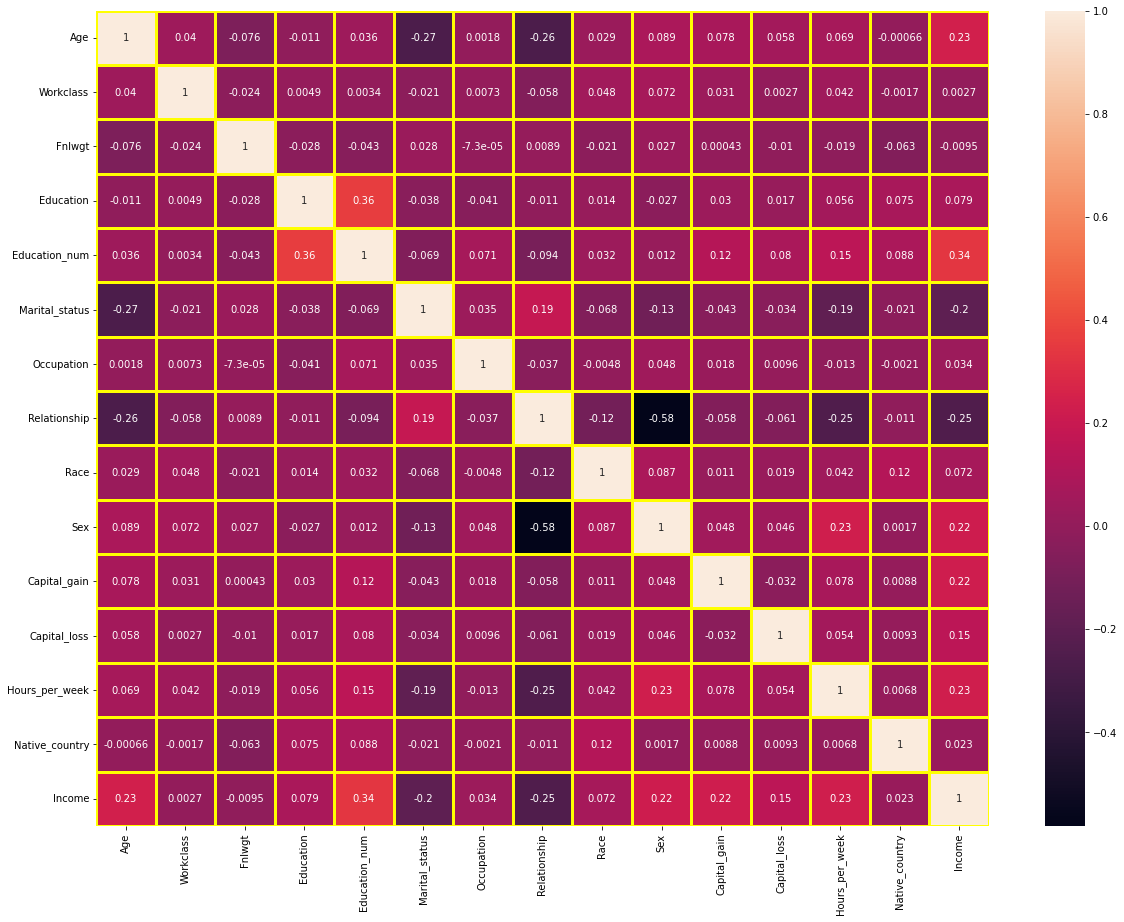

In [65]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

### OBSERVATIONS :


  -  Workclass and Fnlwgt are very very less correlated with target variable which is less than 1%. Let's remove it.
  -  Maximum value of correlation with target variable is 0.34 which exist between Education_num and Income.
  -  education, occupation, race, native_country are also less correlated i.e. less than 10% with target.

### Correlation with Other features with Income:


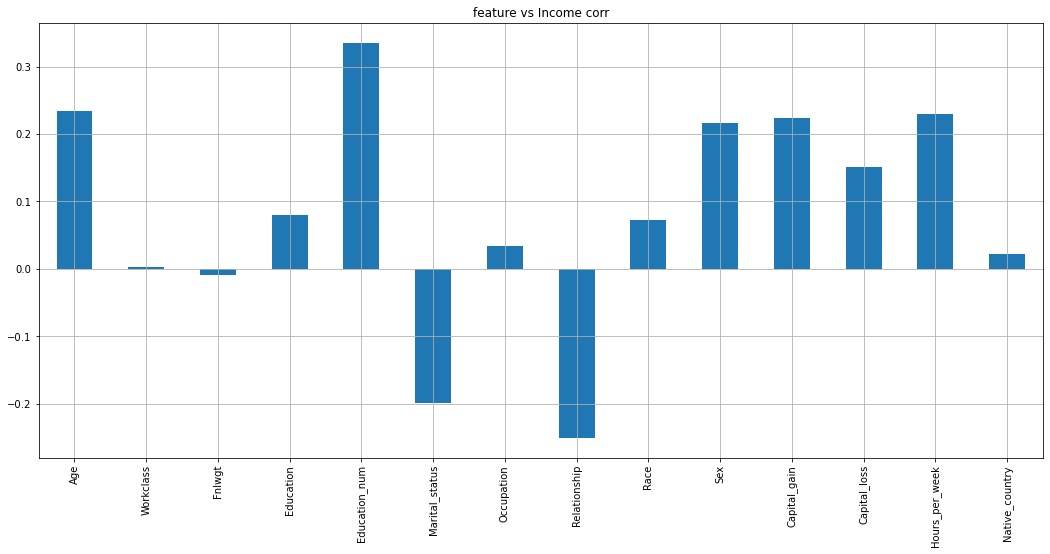

In [66]:


data.drop("Income", axis=1).corrwith(data["Income"]).plot(kind='bar',
                    figsize=(18,8),grid='True',title='feature vs Income corr')
plt.show()



In [67]:
data.drop(['Workclass' , 'Fnlwgt'],axis =1, inplace= True)
data.columns

Index(['Age', 'Education', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

### Outliers Detection and Removal:


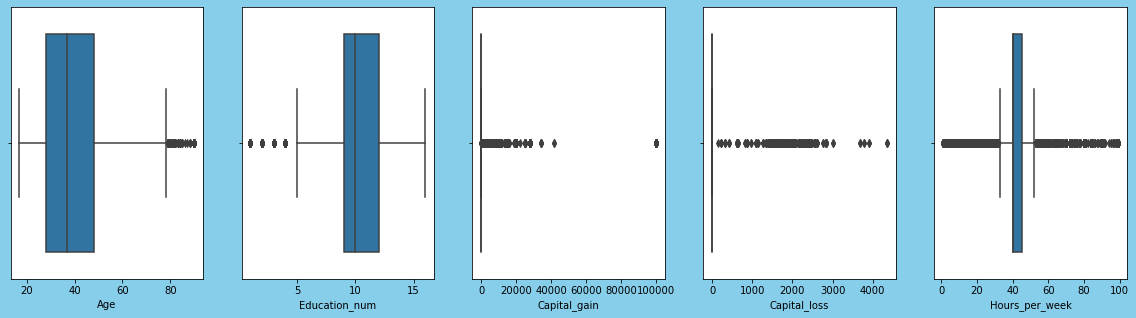

In [68]:
plt.figure(figsize=(20,5),facecolor='skyblue')
plotnumber=1
data1= data .drop(["Education", "Marital_status", "Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"], axis=1)
for x in data1:
    if plotnumber<=6:
        ax=plt.subplot(1,5,plotnumber)
        sns.boxplot(data1[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

Age                  AxesSubplot(0.125,0.125;0.133621x0.755)
Education_num     AxesSubplot(0.285345,0.125;0.133621x0.755)
Capital_gain       AxesSubplot(0.44569,0.125;0.133621x0.755)
Capital_loss      AxesSubplot(0.606034,0.125;0.133621x0.755)
Hours_per_week    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

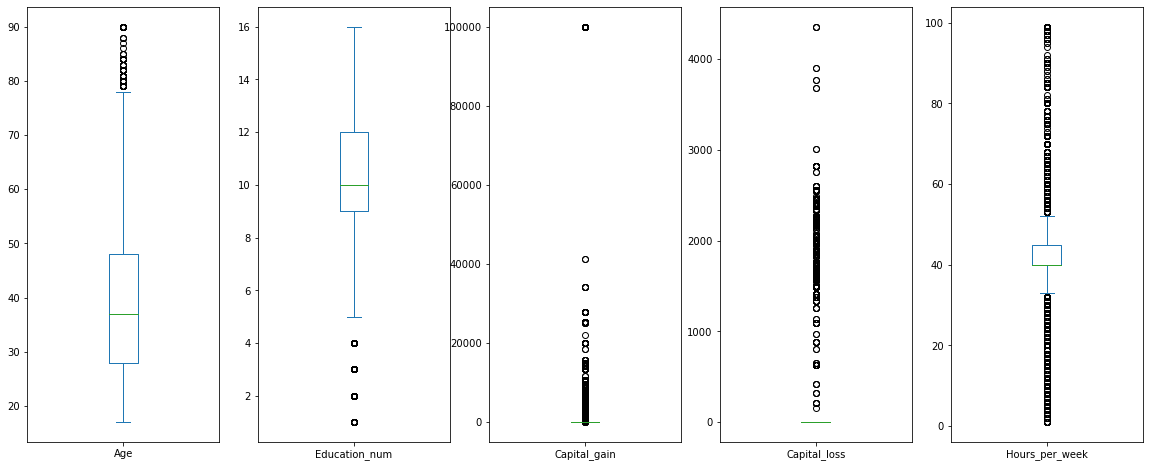

In [69]:
data1.plot(kind ='box', subplots =True , layout =(1,5), figsize = (20,8))



### OBSERVATIONS :

- From the previous Boxplot , it is seen that there is outiers in featues columns. Let's remove it.


### Outliers removal by Z score:

Let's take the Z Score =3 Any data with Z Score>3, should to be rejected



In [70]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64), array([11, 10,  6, ...,  6,  6,  6], dtype=int64))


In [71]:
data1 = data[(z<3).all(axis = 1)]
data1.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,9,13,2,3,0,4,1,0,0,13,38,0
1,38,11,9,0,5,1,4,1,0,0,40,38,0
2,53,1,7,2,5,0,2,1,0,0,40,38,0
4,37,12,14,2,3,5,4,0,0,0,40,38,0
5,49,6,5,3,7,1,2,0,0,0,16,22,0


In [72]:


data1.shape



(28074, 13)

In [73]:


data.shape



(32536, 13)

In [74]:
print ("Percentage of data loss",(data.shape[0]- data1.shape[0])/data.shape[0])




Percentage of data loss 0.1371403983280059


### Correlation after encoding data:


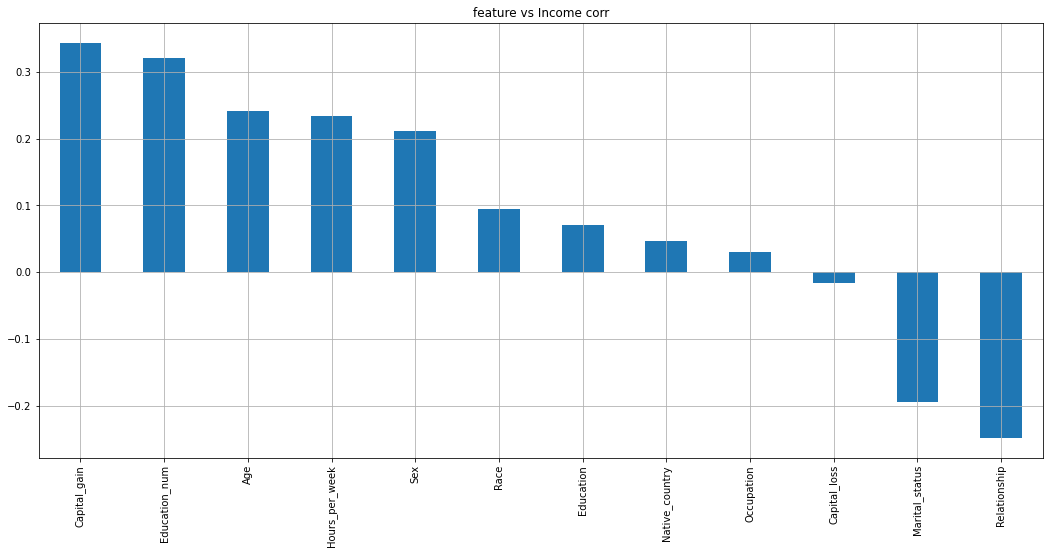

In [75]:
data1.drop("Income", axis=1).corrwith(data1["Income"]).sort_values(ascending=False) .plot(kind='bar',
                    figsize=(18,8),grid='True',title='feature vs Income corr')
plt.show()

### Skewness:


In [76]:


data1.skew()



Age                0.487919
Education         -0.955265
Education_num     -0.147568
Marital_status    -0.046476
Occupation         0.015698
Relationship       0.751671
Race              -2.549433
Sex               -0.689872
Capital_gain       4.925018
Capital_loss      29.676186
Hours_per_week    -0.359251
Native_country    -5.349560
Income             1.322727
dtype: float64

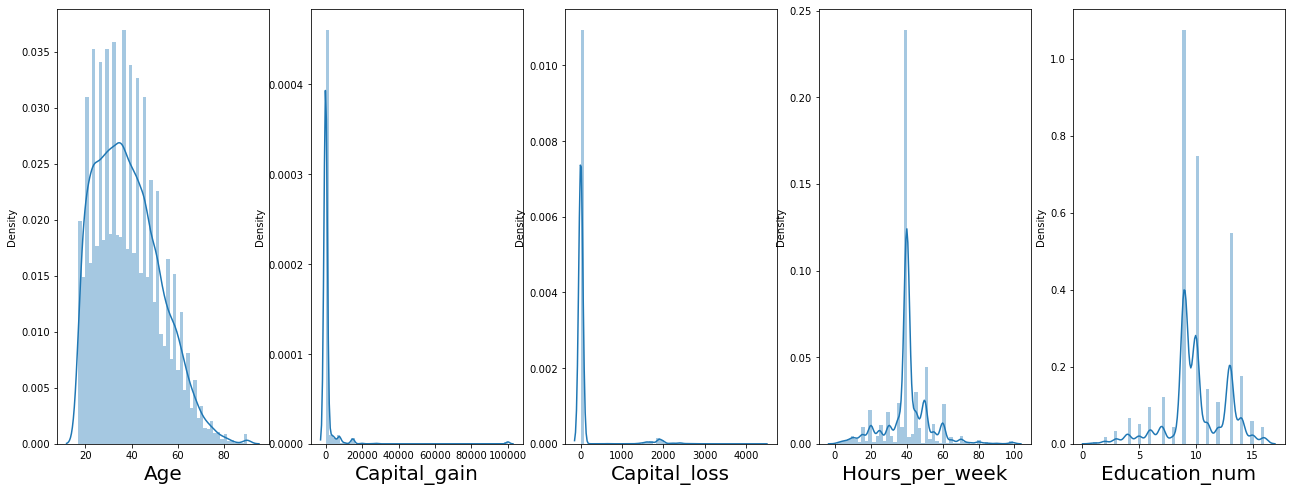

In [77]:
plt.figure(figsize=(22,8),facecolor='white')
plotnum=1
for col in data[['Age','Capital_gain','Capital_loss','Hours_per_week', 'Education_num']]:
    if plotnum<=5:
        plt.subplot(1,5,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

### OBSERVATIONS :


  -  For Numarical data, Capital_gain and Capital_loss have a lot of skewness.

### Data Balancing:

Let's balance the target variable Income by appropiate method

In [78]:


#0 means <=50k
#1 means >50k
data['Income'].value_counts() 



0    24697
1     7839
Name: Income, dtype: int64

In [79]:
from imblearn.over_sampling import SMOTE
over = SMOTE()

In [80]:
# splitting data in target and dependent feature
x = data.drop(['Income'], axis =1)
y = data['Income']
x,y = over.fit_resample(x,y)
y.value_counts()

0    24697
1    24697
Name: Income, dtype: int64

### Checking Multicollinearity:


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data1.values,i)for i in range(data1.shape[1])]
vif["Features"] = data1.columns
vif

,VIF,Features
0,10.415170,Age
1,9.299361,Education
2,24.045839,Education_num
3,4.357184,Marital_status
4,3.371870,Occupation
5,2.937796,Relationship
6,35.879284,Race
7,4.550044,Sex
8,1.209772,Capital_gain
9,1.004205,Capital_loss


### OBSERVATIONS :


  -  Multicollinearity present between different features.
  -  Education_num, Race, Hours_per_week, Native_country have a huge multicollinerity with others features.

Remove this after checking PCA.


### Principal Component Analysis (PCA) :

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

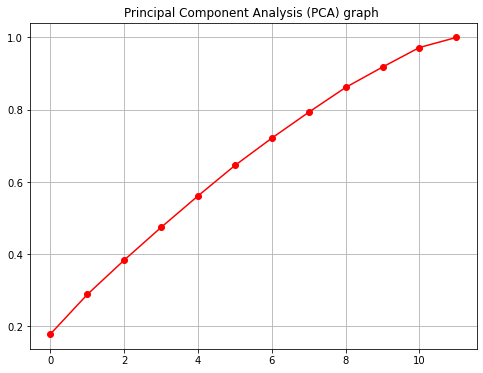

In [83]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()



### OBSERVATIONS :

Here , to get 90% variance gives the first 9 component. Let's take this.

In [84]:
pca_new = PCA(n_components=9)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()

,0,1,2,3,4,5,6,7,8
0,-0.306157,0.249304,-0.612111,0.818044,-0.075402,0.460768,-0.639576,1.885604,0.452754
1,-0.705495,0.420153,-0.577394,0.917964,-0.039271,-0.265144,-0.571703,-0.566119,-0.174092
2,-0.019815,2.999713,0.936302,0.867563,-0.121091,0.475394,0.555608,0.342247,-2.017603
3,2.895558,-0.069442,5.150024,-0.038504,0.880116,-0.083163,-0.925938,-1.917365,2.190782
4,1.777822,-2.176176,-0.312250,1.112471,0.202387,-0.231071,-0.068256,-0.910832,0.266301


### Final predictions using different Classification ML Models for Income:


#### Find best Random state:


In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(1, 400):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.7773099036359219 on Random_state 49


In [86]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (37045, 9)
Training target shape: (37045,)
Test feature shape: (12349, 9)
Test target shape: (12349,)


In [87]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=155)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.7721272977569034
cof_mat:
  [[4790 1445]
 [1369 4745]]
classification report:
                precision    recall  f1-score   support

           0       0.78      0.77      0.77      6235
           1       0.77      0.78      0.77      6114

    accuracy                           0.77     12349
   macro avg       0.77      0.77      0.77     12349
weighted avg       0.77      0.77      0.77     12349

-----------
-----------
training score :  0.7642866783641518
testing score :  0.7721272977569034


In [88]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [89]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.7742327313952547
cof_mat:

  [[4763 1472]
 [1316 4798]]
classification report:
                precision    recall  f1-score   support

           0       0.78      0.76      0.77      6235
           1       0.77      0.78      0.77      6114

    accuracy                           0.77     12349
   macro avg       0.77      0.77      0.77     12349
weighted avg       0.77      0.77      0.77     12349

-----------
-----------
training score :  0.7669860979889324
testing score :  0.7742327313952547


### Using DecisionTreeClassifier()


In [90]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.8148837962588064


cof_mat:  [[5043 1192]
 [1094 5020]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      6235
           1       0.81      0.82      0.81      6114

    accuracy                           0.81     12349
   macro avg       0.81      0.81      0.81     12349
weighted avg       0.81      0.81      0.81     12349

-----------
-----------
training score :  0.9663922256714806
testing score :  0.8148837962588064


### Use GridSearchCV for hyperparameter tuning:


In [91]:
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=7, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_split': 3, 'splitter': 'best'}


In [92]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.791562069803223


cof_mat:  [[4708 1527]
 [1047 5067]]


classification report: 

               precision    recall  f1-score   support

           0       0.82      0.76      0.79      6235
           1       0.77      0.83      0.80      6114

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

-----------
-----------
training score :  0.7917937643406667
testing score :  0.791562069803223


### OBSERVATIONS :

- Accuracy score is not improved after using GridSearchCV with DecisionTreeClassifier().

- But the difference between training score, testing score is interestingly decreased.


### Using GradientBoostingClassifier():


In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.819580532836667


cof_mat:  [[4893 1342]
 [ 886 5228]]


classification report: 

               precision    recall  f1-score   support

           0       0.85      0.78      0.81      6235
           1       0.80      0.86      0.82      6114

    accuracy                           0.82     12349
   macro avg       0.82      0.82      0.82     12349
weighted avg       0.82      0.82      0.82     12349

-----------
-----------
training score :  0.8198677284383857
testing score :  0.819580532836667





### Using Gridsearch CV

In [94]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0], 
        "min_samples_leaf" :[1,2], "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'squared_error', 'learning_rate': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [95]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8201473803546846


cof_mat:  [[4934 1301]
 [ 920 5194]]


classification report:

                precision    recall  f1-score   support

           0       0.84      0.79      0.82      6235
           1       0.80      0.85      0.82      6114

    accuracy                           0.82     12349
   macro avg       0.82      0.82      0.82     12349
weighted avg       0.82      0.82      0.82     12349

-----------
-----------
training score :  0.8556890268592253
testing score :  0.8201473803546846


### OBSERVATIONS :

- Accuracy score, training score, testing score are slightly improved after using GridSearchCV with GradientBoostingClassifier()

### Using RandomForestClassifier()


In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8595837719653413


cof_mat:  [[5249  986]
 [ 748 5366]]


classification report:                precision    recall  f1-score   support

           0       0.88      0.84      0.86      6235
           1       0.84      0.88      0.86      6114

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349

-----------
-----------
training score :  0.9663922256714806
testing score :  0.8595837719653413


### Use GridSearchCV for hyperparameter tuning:


In [98]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy","log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'log_loss', 'min_samples_leaf': 1, 'n_estimators': 100}


In [99]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.859664750182201


cof_mat:  [[5241  994]
 [ 739 5375]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6235
           1       0.84      0.88      0.86      6114

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349

-----------
-----------
training score :  0.9663922256714806
testing score :  0.859664750182201


### OBSERVATIONS :

Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier()


### ExtraTreesClassifier():




In [100]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.861851162037412


cof_mat:  [[5326  909]
 [ 797 5317]]


classification report:                precision    recall  f1-score   support

           0       0.87      0.85      0.86      6235
           1       0.85      0.87      0.86      6114

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349

-----------
-----------
training score :  0.9663922256714806
testing score :  0.861851162037412


### Use GridSearchCV for hyperparameter tuning:


In [101]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy","log_loss"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'log_loss', 'min_samples_leaf': 2, 'n_estimators': 150}


In [102]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8606364887845169


cof_mat:  [[5236  999]
 [ 722 5392]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6235
           1       0.84      0.88      0.86      6114

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349

-----------
-----------
training score :  0.9569982453772439
testing score :  0.8606364887845169


### OBSERVATIONS :

Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

### Using AdaBoostClassifier:


In [103]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.7897805490323103


cof_mat:  [[4829 1406]
 [1190 4924]]


classification report:                precision    recall  f1-score   support

           0       0.80      0.77      0.79      6235
           1       0.78      0.81      0.79      6114

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

-----------
-----------
training score :  0.7892293156971251
testing score :  0.7897805490323103


### Using GridSearchCV for hyperparameter tuning:


In [104]:
params = {'n_estimators' : [50,40, 60], 'learning_rate': [1,0.1,0.01, 0.001] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 60}


In [106]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.7902664183334683


cof_mat:  [[4865 1370]
 [1220 4894]]


classification report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      6235
           1       0.78      0.80      0.79      6114

    accuracy                           0.79     12349
   macro avg       0.79      0.79      0.79     12349
weighted avg       0.79      0.79      0.79     12349

-----------
-----------
training score :  0.7908219732757457
testing score :  0.7902664183334683


### OBSERVATIONS :

Accuracy score is slightly improved after using GridSearchCV with AdaBoostClassifier().

### Using SVC('rbf'):


In [107]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [108]:


svmkernel('rbf')



accu score :  0.8218479229087375


cof_mat:  [[4758 1477]
 [ 723 5391]]


classification report: 

               precision    recall  f1-score   support

           0       0.87      0.76      0.81      6235
           1       0.78      0.88      0.83      6114

    accuracy                           0.82     12349
   macro avg       0.83      0.82      0.82     12349
weighted avg       0.83      0.82      0.82     12349

-----------
-----------
training score :  0.8163854771224187
testing score :  0.8218479229087375


### Using SVC ('linear'):


In [109]:


svmkernel('linear')



accu score :  0.776824034334764


cof_mat:  [[4727 1508]
 [1248 4866]]


classification report: 

               precision    recall  f1-score   support

           0       0.79      0.76      0.77      6235
           1       0.76      0.80      0.78      6114

    accuracy                           0.78     12349
   macro avg       0.78      0.78      0.78     12349
weighted avg       0.78      0.78      0.78     12349

-----------
-----------
training score :  0.7682548252125793
testing score :  0.776824034334764


### Using SVC ('poly'):


In [110]:


svmkernel('poly')



accu score :  0.7358490566037735


cof_mat:  [[3393 2842]
 [ 420 5694]]


classification report: 

               precision    recall  f1-score   support

           0       0.89      0.54      0.68      6235
           1       0.67      0.93      0.78      6114

    accuracy                           0.74     12349
   macro avg       0.78      0.74      0.73     12349
weighted avg       0.78      0.74      0.73     12349

-----------
-----------
training score :  0.7328924281279525
testing score :  0.7358490566037735


### OBSERVATIONS :

svmkernel('rbf') is better than other in SVM

#### Among 7 models the best models are randomforest(), ExtraTreesClassifier() .Let's check CV score.


### Cross validations:

In [ ]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "rbf"))])

all_models = [grid_log_best, clf , grid_gbdt_best, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(C=0.01, solver='liblinear')

 Cross Validation Score :  [0.75839592 0.76647301 0.76289683 0.76629819 0.77295918 0.76714853
 0.77012472]

Mean CV Score : 0.766328051730554

Std deviation : 0.004371559071537378

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier()

 Cross Validation Score :  [0.8181947  0.82527986 0.86267007 0.87570862 0.88194444 0.87967687
 0.87301587]

Mean CV Score : 0.859498633896901

Std deviation : 0.024621280264150777

-----------
-----------


### OBSERVATIONS :


#### Among 7 classification models RandomforestClassifier() and ExtraTreesClassifier() gives good accuracy and maximum f1 score along with a good Cross-validation score.


### Plotting ROC AUC Curve to choose best model


In [ ]:
grid_log_best.fit(x_train, y_train)
clf.fit(x_train, y_train)
grid_gbdt_best.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
grid_ada_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained

In [115]:
grid_log_best.fit(x_test, y_test)
clf.fit(x_test, y_test)
grid_gbdt_best.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
grid_ada_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


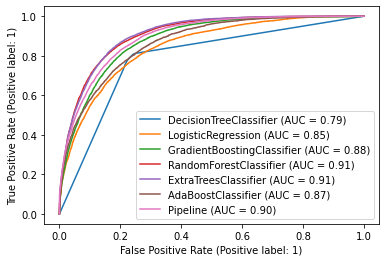

In [116]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_train, y_train)

plot_roc_curve(grid_log_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()



### According to the above plot, the best AUC of training is ExtraTrees classifier and Random Forest classifier

Let's check it by AUC plot of testing.


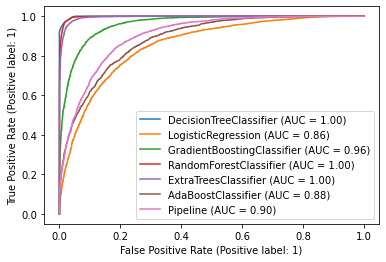

In [117]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(clf, x_test, y_test)

plot_roc_curve(grid_log_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_gbdt_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_ada_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.legend(prop = {'size':10}, loc='lower right')
plt.show()

### To choose best model , let's check the minimum variation of training and testing AUC score.

### Final Model:

In [118]:
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8633087699408859


cof_mat:  [[5239  996]
 [ 692 5422]]


classification report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6235
           1       0.84      0.89      0.87      6114

    accuracy                           0.86     12349
   macro avg       0.86      0.86      0.86     12349
weighted avg       0.86      0.86      0.86     12349

-----------
-----------
training score :  0.9588338507220947
testing score :  0.8633087699408859


#### We can select Extra Tree Classifier as the best Model.

### Confusion matrix of final model:

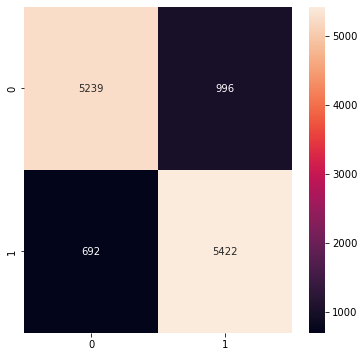

In [119]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()



### Load and save the model

Now , let's save the model for future use.


In [ ]:
import pickle
pickle.dump(grid_etc_best, open("Census_Income_Classification_model", "wb"))
load_Census_Income_Classification_model= pickle.load(open("Census_Income_Classification_model", "rb"))



### Saving the model